In [32]:
#general imports
import pandas as pd
import numpy as np

#statsmodels for regression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col

#scipy for testing
from scipy import stats

#for visualization
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from datetime import timedelta

In [33]:
##Bike Data

In [34]:
df_bikes = pd.read_csv('../data/philadelphia_2017.csv')
df_weather = pd.read_csv('../data/weather_hourly_philadelphia.csv')

df_bikes.head()

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name
0,1/1/2017 0:05,1/1/2017 0:16,3046,3041,5347,Indego30,2nd & Market,"Girard Station, MFL"
1,1/1/2017 0:21,1/1/2017 0:57,3110,3054,3364,Walk-up,Del. River Trail & Penn St.,Rodin Museum
2,1/1/2017 0:22,1/1/2017 0:57,3110,3054,2536,Walk-up,Del. River Trail & Penn St.,Rodin Museum
3,1/1/2017 0:27,1/1/2017 0:39,3041,3005,5176,Indego30,"Girard Station, MFL","Welcome Park, NPS"
4,1/1/2017 0:28,1/1/2017 0:36,3047,3124,5370,Walk-up,"Independence Mall, NPS",Race Street Pier


In [35]:
df_bikes.describe()

,start_station_id,end_station_id,bike_id
count,788907.000000,788907.000000,788907.000000
mean,3057.400081,3056.431487,5428.980913
std,41.126829,41.108792,3221.972215
min,3000.000000,3000.000000,0.000000
25%,3023.000000,3023.000000,3350.000000
50%,3050.000000,3049.000000,3703.000000
75%,3075.000000,3074.000000,5370.000000
max,3170.000000,3170.000000,11965.000000


In [36]:
##Weather Data

In [37]:
df_weather.head()

,date_time,max_temp,min_temp,precip
0,2015-01-02 01:00:00,3.3,3.3,0.0
1,2015-01-02 02:00:00,2.8,2.8,0.0
2,2015-01-02 03:00:00,2.2,2.2,0.0
3,2015-01-02 04:00:00,0.6,0.6,0.0
4,2015-01-02 05:00:00,1.1,1.1,0.0


In [38]:
df_weather.describe()

,max_temp,min_temp,precip
count,43785.000000,43785.000000,43785.000000
mean,14.204796,14.121300,0.087770
std,10.272673,10.259344,0.282963
min,-16.700000,-16.700000,0.000000
25%,6.100000,6.100000,0.000000
50%,15.000000,14.400000,0.000000
75%,22.800000,22.800000,0.000000
max,36.700000,36.700000,1.000000


In [39]:

df_bikes = pd.read_csv('../data/philadelphia_2017.csv')

df_bikes["start_time"] = pd.to_datetime(df_bikes["start_time"], dayfirst = True)

df_bikes["end_time"] = pd.to_datetime(df_bikes["end_time"], dayfirst = True)

df_bikes['ride_duration_minutes'] = df_bikes['end_time'] - df_bikes['start_time']

ride_lengths = []

for label, content in df_bikes.iterrows():
    ride_lengths.append(content["ride_duration_minutes"])

ride_lengths_np = np.array(ride_lengths)
iqr = stats.iqr(ride_lengths_np)

q1,q3 = np.percentile(ride_lengths_np, [25,99.9])

upper_range = q3 + (1.5*iqr)

df_bikes.drop(df_bikes[ (df_bikes.ride_duration_minutes > upper_range) | (df_bikes.end_time > pd.to_datetime("2017-12-31 23:59:59")) | (df_bikes.start_time > pd.to_datetime("2017-12-31 23:59:59")) | (df_bikes.ride_duration_minutes < pd.to_timedelta(0))].index , inplace=True)

df_bikes.head(10)

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,ride_duration_minutes
0,2017-01-01 00:05:00,2017-01-01 00:16:00,3046,3041,5347,Indego30,2nd & Market,"Girard Station, MFL",0 days 00:11:00
1,2017-01-01 00:21:00,2017-01-01 00:57:00,3110,3054,3364,Walk-up,Del. River Trail & Penn St.,Rodin Museum,0 days 00:36:00
2,2017-01-01 00:22:00,2017-01-01 00:57:00,3110,3054,2536,Walk-up,Del. River Trail & Penn St.,Rodin Museum,0 days 00:35:00
3,2017-01-01 00:27:00,2017-01-01 00:39:00,3041,3005,5176,Indego30,"Girard Station, MFL","Welcome Park, NPS",0 days 00:12:00
4,2017-01-01 00:28:00,2017-01-01 00:36:00,3047,3124,5370,Walk-up,"Independence Mall, NPS",Race Street Pier,0 days 00:08:00
5,2017-01-01 00:29:00,2017-01-01 00:36:00,3047,3124,2479,Walk-up,"Independence Mall, NPS",Race Street Pier,0 days 00:07:00
6,2017-01-01 00:31:00,2017-01-01 00:40:00,3072,3068,5332,Indego30,Front & Carpenter,Broad & Federal,0 days 00:09:00
7,2017-01-01 00:34:00,2017-01-01 00:50:00,3033,3114,5359,Indego30,10th & Chestnut,22nd & Federal,0 days 00:16:00
8,2017-01-01 00:38:00,2017-01-01 00:57:00,3013,3028,3716,Walk-up,6th & Fairmount,4th & Bainbridge,0 days 00:19:00
9,2017-01-01 00:40:00,2017-01-01 00:57:00,3013,3028,2557,Walk-up,6th & Fairmount,4th & Bainbridge,0 days 00:17:00


In [40]:
df_weather["date_time"] = pd.to_datetime(df_weather["date_time"])

In [41]:
df_weather = df_weather.sort_values(by=['date_time'])

In [42]:
start2017 = datetime(2016, 12, 31, 23)
end2017 = datetime(2018, 1, 1)

df_2017weather = df_weather[(df_weather["date_time"] > start2017) & (df_weather["date_time"] < end2017)]
df_2017weather_unique = df_2017weather.drop_duplicates(subset='date_time')
df_2017weather_unique['Order'] = np.arange(len(df_2017weather_unique))
df_2017weather_unique = df_2017weather_unique.set_index('Order')

<ipython-input-42-92eb66279140>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2017weather_unique['Order'] = np.arange(len(df_2017weather_unique))


In [43]:
for i in df_2017weather_unique.index:
    if i == 8231:
        pass
    elif (df_2017weather_unique['date_time'][i] - df_2017weather_unique['date_time'][i+1]) != (df_2017weather_unique['date_time'][1] - df_2017weather_unique['date_time'][2]):
        df_2017weather_support = {'date_time': (df_2017weather_unique['date_time'][i] + pd.DateOffset(hours=1)), 'max_temp': (df_2017weather_unique['max_temp'][i] + df_2017weather_unique['max_temp'][i+1])/2, 'min_temp': (df_2017weather_unique['max_temp'][i] + df_2017weather_unique['max_temp'][i+1])/2, 'precip': df_2017weather_unique['precip'][i]}
        df_2017weather_unique = df_2017weather_unique.append(df_2017weather_support, ignore_index=True)

In [44]:
df_2017weather_unique = df_2017weather_unique.sort_values(by=['date_time'])
df_2017weather_unique['Order'] = np.arange(len(df_2017weather_unique))
df_2017weather_unique = df_2017weather_unique.set_index('Order')

In [45]:
for i in df_2017weather_unique.index:
    if i == 8758:
        pass
    elif (df_2017weather_unique['date_time'][i] - df_2017weather_unique['date_time'][i+1]) != (df_2017weather_unique['date_time'][1] - df_2017weather_unique['date_time'][2]):
        df_2017weather_support = {'date_time': (df_2017weather_unique['date_time'][i] + pd.DateOffset(hours=1)), 'max_temp': (df_2017weather_unique['max_temp'][i] + df_2017weather_unique['max_temp'][i+1])/2, 'min_temp': (df_2017weather_unique['max_temp'][i] + df_2017weather_unique['max_temp'][i+1])/2, 'precip': df_2017weather_unique['precip'][i]}
        df_2017weather_unique = df_2017weather_unique.append(df_2017weather_support, ignore_index=True)

In [46]:
df_2017weather_unique = df_2017weather_unique.sort_values(by=['date_time'])
df_2017weather_unique['Order'] = np.arange(len(df_2017weather_unique))
df_2017weather_unique = df_2017weather_unique.set_index('Order')
df_2017weather_unique.head()

,date_time,max_temp,min_temp,precip
Order,,,,
0,2017-01-01 00:00:00,6.1,6.1,0.0
1,2017-01-01 01:00:00,6.1,6.1,0.0
2,2017-01-01 02:00:00,6.7,6.7,0.0
3,2017-01-01 03:00:00,7.2,7.2,0.0
4,2017-01-01 04:00:00,7.8,7.8,0.0


In [47]:
for i in df_2017weather_unique.index:
    if i == 8759:
        pass
    elif (df_2017weather_unique['date_time'][i] - df_2017weather_unique['date_time'][i+1]) != (df_2017weather_unique['date_time'][1] - df_2017weather_unique['date_time'][2]):
        df_2017weather_support = {'date_time': (df_2017weather_unique['date_time'][i] + pd.DateOffset(hours=1)), 'max_temp': (df_2017weather_unique['max_temp'][i] + df_2017weather_unique['max_temp'][i+1])/2, 'min_temp': (df_2017weather_unique['max_temp'][i] + df_2017weather_unique['max_temp'][i+1])/2, 'precip': df_2017weather_unique['precip'][i]}
        df_2017weather_unique = df_2017weather_unique.append(df_2017weather_support, ignore_index=True)

def would_be_rounded_up(num):
    if round(num) == int(num) + 1:
        return True
    else:
        return False

def get_precip(start_time, end_time):
    return df_2017weather_unique["precip"][get_weather_df_row(start_time, end_time)]

def get_temperature(start_time, end_time):
    row = get_weather_df_row(start_time, end_time)
    return (df_2017weather_unique["min_temp"][row] + df_2017weather_unique["max_temp"][row])/2

def get_weather_df_row(start_time, end_time):
    duration_of_travel = end_time-start_time
    average_timestamp = end_time - datetime.fromisoformat("2017-01-01 00:00:00") - duration_of_travel/2
    weather_row = average_timestamp.total_seconds()/3600
    return int(weather_row)

df_bikes["temperature"] = df_bikes.apply(lambda x: get_temperature(x["start_time"], x["end_time"]), axis=1)
df_bikes["precip"] = df_bikes.apply(lambda x: get_precip(x["start_time"],x["end_time"]), axis=1)

In [48]:
df_bikes.tail(5)

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,ride_duration_minutes,temperature,precip
788900,2017-12-31 22:56:00,2017-12-31 22:59:00,3045,3052,11870,Indego30,13th & Locust,9th & Locust,0 days 00:03:00,-10.0,0.0
788902,2017-12-31 23:05:00,2017-12-31 23:33:00,3070,3124,3708,Indego30,"Spring Garden Station, MFL",Race Street Pier,0 days 00:28:00,-10.0,0.0
788904,2017-12-31 23:18:00,2017-12-31 23:25:00,3033,3046,11933,Indego30,10th & Chestnut,2nd & Market,0 days 00:07:00,-10.0,0.0
788905,2017-12-31 23:39:00,2017-12-31 23:40:00,3163,3163,6725,Indego30,25th & Locust,25th & Locust,0 days 00:01:00,-10.0,0.0
788906,2017-12-31 23:41:00,2017-12-31 23:55:00,3163,3057,11864,Indego30,25th & Locust,Philadelphia Museum of Art,0 days 00:14:00,-10.0,0.0


In [49]:
df_2017weather_unique.tail(5)


,date_time,max_temp,min_temp,precip
Order,,,,
8755,2017-12-31 19:00:00,-8.9,-8.9,0.0
8756,2017-12-31 20:00:00,-8.9,-8.9,0.0
8757,2017-12-31 21:00:00,-9.4,-9.4,0.0
8758,2017-12-31 22:00:00,-10.0,-10.0,0.0
8759,2017-12-31 23:00:00,-10.0,-10.0,0.0


In [50]:
df_bikes['weekday'] = df_bikes["start_time"].apply(lambda x: x.weekday())


#checks whether the weekday is a day in the week(1) or in weekend(0)
def is_weekday(day):
    if day == 5 or day == 6:
        return 0
    else:
        return 1


df_bikes['is_weekday'] = df_bikes['weekday'].apply(lambda x: is_weekday(x))

df_bikes.head()


,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,ride_duration_minutes,temperature,precip,weekday,is_weekday
0,2017-01-01 00:05:00,2017-01-01 00:16:00,3046,3041,5347,Indego30,2nd & Market,"Girard Station, MFL",0 days 00:11:00,6.1,0.0,6,0
1,2017-01-01 00:21:00,2017-01-01 00:57:00,3110,3054,3364,Walk-up,Del. River Trail & Penn St.,Rodin Museum,0 days 00:36:00,6.1,0.0,6,0
2,2017-01-01 00:22:00,2017-01-01 00:57:00,3110,3054,2536,Walk-up,Del. River Trail & Penn St.,Rodin Museum,0 days 00:35:00,6.1,0.0,6,0
3,2017-01-01 00:27:00,2017-01-01 00:39:00,3041,3005,5176,Indego30,"Girard Station, MFL","Welcome Park, NPS",0 days 00:12:00,6.1,0.0,6,0
4,2017-01-01 00:28:00,2017-01-01 00:36:00,3047,3124,5370,Walk-up,"Independence Mall, NPS",Race Street Pier,0 days 00:08:00,6.1,0.0,6,0


In [171]:
# array containing all dates of the year
start_hours_2017 = datetime(2017, 1, 1, 0)
add_hour = timedelta(hours = 1)

hours_2017 = []

for i in range(0, 8760):
    hours_2017.append(start_hours_2017)
    start_hours_2017 += add_hour

hours = range(0, 8760)
hours_Series = pd.Series(hours_2017, index=hours)
hours_Series




0      2017-01-01 00:00:00
1      2017-01-01 01:00:00
2      2017-01-01 02:00:00
3      2017-01-01 03:00:00
4      2017-01-01 04:00:00
               ...        
8755   2017-12-31 19:00:00
8756   2017-12-31 20:00:00
8757   2017-12-31 21:00:00
8758   2017-12-31 22:00:00
8759   2017-12-31 23:00:00
Length: 8760, dtype: datetime64[ns]

In [172]:
#sums up all loans for every hour in 2017 and shows it in a dataframe
def loans_per_hour(month, day, hour):
    if hour == np.NaN:
        hour =0;

    hour_in_2017_start = datetime(2017, month = int(month), day = int(day), hour = hour)
    hour_in_2017_end = datetime(2017, month, day, hour, 59)
    df_hour_start = df_bikes[df_bikes["start_time"] >= hour_in_2017_start]
    df_hour_end = df_hour_start[df_hour_start["start_time"] <= hour_in_2017_end]
    return len(df_hour_end)


lin_reg_bikes_df = pd.DataFrame({'date': pd.concat([hours_Series])},
                                index=range(0, 8760),
                                columns=['date'])

lin_reg_bikes_df['weekday'] = lin_reg_bikes_df['date'].apply(lambda x: x.weekday())
lin_reg_bikes_df['is_weekday'] = lin_reg_bikes_df['weekday'].apply(lambda x: is_weekday(x))
lin_reg_bikes_df['loans'] = lin_reg_bikes_df['date'].apply(lambda x: loans_per_hour(x.month, x.day, x.hour))


lin_reg_bikes_df.tail()






,date,weekday,is_weekday,loans
8755,2017-12-31 19:00:00,6,0,14
8756,2017-12-31 20:00:00,6,0,4
8757,2017-12-31 21:00:00,6,0,7
8758,2017-12-31 22:00:00,6,0,10
8759,2017-12-31 23:00:00,6,0,4


In [51]:

#ride_lengths_np = np.array(ride_lengths)
#iqr = stats.iqr(ride_lengths_np)
#iqr

#q1,q3 = np.percentile(ride_lengths_np, [25,95])

#lower_range = q1 - (1.5*iqr)
#upper_range = q3 + (1.5*iqr)


#minutes_0 = timedelta(minutes=0)

#A ride, can't be shorter than 0 Minutes obviously
#if lower_range < minutes_0:
#    lower_range = minutes_0

#df_bikes.drop(df_bikes[ (df_bikes['duration'].apply(lambda x: x) > upper_range) | (df_bikes['duration'].apply(lambda x: x) < lower_range) ].index , inplace=True)

In [52]:
#print(len(df_bikes))

In [53]:
#df_bikes['end_time_rounded'] = df_bikes["end_time"][0].replace(minute=0)
#df_bikes.head(30)

In [54]:
#s = 0
#z = 1
#for x in range(0,788906):
 #   if x not in df_bikes.index:
 #       s = s + 1
 #       if s == 1000*z:
 #           print(x)
 #           z = z + 1
 #       else:
 #           pass
 #   else:
  #      df_bikes['end_time_rounded'][x] = df_bikes["end_time"][x].replace(minute=0)

#df_bikes.head(5)


In [55]:
#df_bikes['end_time_rounded'] = df_bikes['end_time_rounded'].dt.strftime("%y/%m/%d %H")
#df_bikes.head()


In [56]:
ride_lengths = []

for label, content in df_bikes.iterrows():
    ride_lengths.append(content['ride_duration_minutes'])

In [57]:

unique_station_ids = set(df_bikes['start_station_id'])
id_mapped_to_station = []
for id in unique_station_ids:
    this_station = []
    this_station.append(id)
    this_station.append(df_bikes.loc[df_bikes['start_station_id'] == id].iloc[0]['start_station_name'])
    id_mapped_to_station.append(this_station)
print(id_mapped_to_station)

[[3072, 'Front & Carpenter'], [3073, '9th & Spring Garden'], [3074, '44th & Walnut'], [3075, 'Fairmount & Ridge'], [3077, '17th & Girard'], [3078, '19th & Market'], [3083, '3083'], [3086, 'Broad & Christian'], [3088, '3rd & Girard'], [3093, '33rd & Diamond'], [3095, '29th & Diamond'], [3096, '29th & Dauphin'], [3097, 'Berks Station, MFL'], [3098, '10th & Federal'], [3099, '4th & Washington'], [3100, 'Moyamensing & Tasker'], [3101, '11th & South'], [3102, 'Pennsylvania & Fairmount Perelman Building'], [3103, '27th & Master, Athletic Recreation Center'], [3104, '34th & Mantua'], [3105, 'Penn Treaty Park'], [3106, '33rd & Dauphin'], [3107, '33rd & Reservoir'], [3108, '15th & Market'], [3109, 'Parkside & Girard'], [3110, 'Del. River Trail & Penn St.'], [3111, 'Parkside & Belmont, Case Building'], [3112, '48th & Spruce'], [3113, 'Philadelphia Zoo'], [3114, '22nd & Federal'], [3115, '19th & Girard, PTTI'], [3116, 'Barnes Foundation'], [3117, 'ParkWest Town Center'], [3118, '46th Street Stati

In [58]:

# das noch mit den IDs oder Namen der Stations matchen
starting_id_loans = []
for id in unique_station_ids:
    starting_id_loans.append(sum(1 for i in df_bikes['start_station_id'] if i == id))
print(starting_id_loans)

[4671, 6109, 5370, 5442, 2210, 10960, 10, 5651, 2794, 769, 1602, 980, 2620, 4726, 4370, 6516, 13876, 11746, 1093, 1836, 1167, 1204, 1389, 12986, 1401, 3415, 1689, 4836, 856, 6484, 3155, 48, 878, 2491, 2085, 5451, 5629, 830, 1333, 5165, 10228, 4049, 1660, 782, 1483, 3456, 1268, 5722, 2225, 2876, 4063, 2785, 4520, 3727, 4713, 587, 971, 133, 967, 3632, 110, 9008, 4678, 7819, 12093, 2963, 11425, 23638, 4237, 15337, 4917, 1889, 6550, 751, 1412, 11639, 4096, 16025, 19813, 14381, 24809, 4997, 6626, 8481, 4575, 12760, 11640, 8998, 6067, 16333, 8477, 7846, 5429, 2803, 6734, 10004, 5102, 9955, 4322, 5317, 19209, 9370, 9061, 5583, 7449, 9324, 12295, 8134, 16388, 6202, 8962, 14182, 9958, 8077, 8401, 10227, 6602, 12838, 9207, 1423, 10825, 750, 7740, 6366, 5386, 4391]


In [59]:

# das noch mit den IDs oder Namen der Stations matchen
ending_id_loans = []
for id in unique_station_ids:
    ending_id_loans.append(sum(1 for i in df_bikes['end_station_id'] if i == id))
print(starting_id_loans)

[4671, 6109, 5370, 5442, 2210, 10960, 10, 5651, 2794, 769, 1602, 980, 2620, 4726, 4370, 6516, 13876, 11746, 1093, 1836, 1167, 1204, 1389, 12986, 1401, 3415, 1689, 4836, 856, 6484, 3155, 48, 878, 2491, 2085, 5451, 5629, 830, 1333, 5165, 10228, 4049, 1660, 782, 1483, 3456, 1268, 5722, 2225, 2876, 4063, 2785, 4520, 3727, 4713, 587, 971, 133, 967, 3632, 110, 9008, 4678, 7819, 12093, 2963, 11425, 23638, 4237, 15337, 4917, 1889, 6550, 751, 1412, 11639, 4096, 16025, 19813, 14381, 24809, 4997, 6626, 8481, 4575, 12760, 11640, 8998, 6067, 16333, 8477, 7846, 5429, 2803, 6734, 10004, 5102, 9955, 4322, 5317, 19209, 9370, 9061, 5583, 7449, 9324, 12295, 8134, 16388, 6202, 8962, 14182, 9958, 8077, 8401, 10227, 6602, 12838, 9207, 1423, 10825, 750, 7740, 6366, 5386, 4391]


Text(0, 0.5, 'EndID')

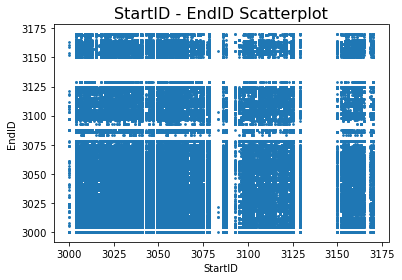

In [60]:

# just tested
fig, scplot_ids = plt.subplots(nrows=1,ncols=1)
scplot_ids.scatter(df_bikes['start_station_id'],df_bikes['end_station_id'],s=3)
scplot_ids.set_title("StartID - EndID Scatterplot",fontsize=16)
scplot_ids.set_xlabel("StartID")
scplot_ids.set_ylabel("EndID")
#scplot_ids.show()

## KPI Utilization

In [61]:

#lists up all possible user types

#Note:
#Because we are working in 2021 with this dataset, some passes have changed. We got our Information
#from the official Indego Website so we derived that the 2017 user type 'Walk-up' is equivalent
#to the 2021 'Guest Pass'.
#Furthermore the user types 'IndegoFlex', 'OneDayPass' and 'TwoDayPass' do not exist any more in
#2021. Due to the low amount of loans of these user types we decided to drop them and focus on the
#more relevant user types which still exist and have significant more loans.

sumIndego30 = sum(1 for i in df_bikes["user_type"] if i == 'Indego30')
sumWalkUp = sum(1 for i in df_bikes["user_type"] if i == 'Walk-up')
sumIndegoFlex = sum(1 for i in df_bikes["user_type"] if i == 'IndegoFlex')
sumOneDayPass = sum(1 for i in df_bikes["user_type"] if i == 'One Day Pass')
sumTwoDayPass = sum(1 for i in df_bikes["user_type"] if i == 'Two Day Pass')
sumIndego365 = sum(1 for i in df_bikes["user_type"] if i == 'Indego365')


user_type_dict = {'Indego30': sumIndego30,
                  'WalkUp': sumWalkUp,
                  'IndegoFlex': sumIndegoFlex,
                  'OneDayPass': sumOneDayPass,
                  'TwoDayPass': sumTwoDayPass,
                  'Indego365': sumIndego365
                 }
user_type = pd.Series(user_type_dict)
user_type


Indego30      667066
WalkUp        100233
IndegoFlex      6029
OneDayPass      6326
TwoDayPass      1603
Indego365       6839
dtype: int64

In [62]:

#Wert müsste ungefähr passen. Laut Internetseite von Indego haben die seit 2019 1400 Fahrräder in der Flotte.

unique_bike_id = set(df_bikes['bike_id'])

print(len(unique_bike_id))

1250


In [63]:

#sums up the number of loans of one specific bike in the dataset within 2017 (type in bike ID)
def calc_unique_bike_amount_rides(v):
    unique_bike_amount_rides = sum(1 for i in df_bikes["bike_id"] if i == v)
    return print(unique_bike_amount_rides)

calc_unique_bike_amount_rides(2536)


622


In [64]:
# Type in the parameters to get the utilization in % at this point of time.
# Regarding to the unique bike id's Indego had 1250 bikes in his fleet in 2017.
def utilization(year, month, day, hour, minute):
    point_of_time = datetime(year, month, day, hour, minute)
    df_smaller_pot = df_bikes[df_bikes["start_time"] < point_of_time]
    df_greater_pot = df_smaller_pot[df_smaller_pot["end_time"] > point_of_time]
    util = (len(df_greater_pot) / 1250) *100
    return util

# test
utilization(2017, 1, 3, 12, 30)

1.2

In [65]:
#type in the parameters to get the percentage of available bikes at this point of time
def available_bikes(year, month, day, hour, minute):
    point_of_time = datetime(year, month, day, hour, minute)
    df_smaller_pot = df_bikes[df_bikes["start_time"] < point_of_time]
    df_greater_pot = df_smaller_pot[df_smaller_pot["end_time"] > point_of_time]
    avlbl = ((1250 - len(df_greater_pot)) / 1250) *100
    return avlbl

# test
available_bikes(2017, 1, 3, 12, 30)

98.8

In [66]:

#creates an array containing the utilization of every minute within one hour
util_arr = []
for i in range(0, 60):
    util_arr.append(utilization(2017, 1, 3, 12, i))
print(util_arr)
print(max(util_arr))

[0.88, 0.88, 0.96, 0.88, 0.88, 0.88, 1.04, 1.04, 1.04, 1.04, 1.04, 1.1199999999999999, 1.2, 1.28, 1.28, 1.28, 1.28, 1.28, 0.96, 0.96, 1.1199999999999999, 1.1199999999999999, 1.1199999999999999, 1.2, 1.3599999999999999, 1.28, 1.1199999999999999, 1.28, 1.52, 1.3599999999999999, 1.2, 1.1199999999999999, 1.2, 1.3599999999999999, 1.44, 1.52, 1.52, 1.44, 1.52, 1.52, 1.52, 1.44, 1.1199999999999999, 1.2, 1.3599999999999999, 1.04, 1.04, 0.96, 1.1199999999999999, 1.2, 1.3599999999999999, 1.28, 1.28, 1.3599999999999999, 1.3599999999999999, 1.1199999999999999, 1.2, 1.44, 1.52, 1.44]
1.52


In [67]:
def calc_util_percentage(month, day, hour):
    util_arr = []
    max_util = utilization(2017, month, day, hour, 0)
    for i in range(1, 60):
        if max_util < utilization(2017, month, day, hour, i):
            max_util = utilization(2017, month, day, hour, i)
    return max_util

# test
calc_util_percentage(1, 3, 12)

1.52

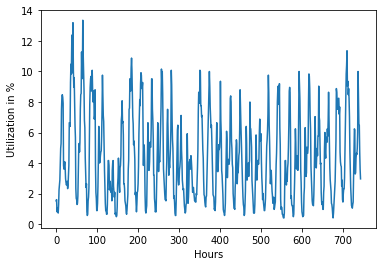

In [169]:

# method to plot the hourly maximum percentage of loan bikes for one month
# type in the month as number(1-12)
def hourly_loans(m):
    hourly_util = datetime(2017, m, 1, 0)
    add_hour = timedelta(hours=1)

    if m == 1 or 3 or 5 or 7 or 8 or 10 or 12:
        h = 31
    elif m == 2:
        h = 28
    else:
        h = 30

    shorter_df = df_bikes[df_bikes["start_time"] >= hourly_util]


    def utilization_h(year, month, day, hour, minute):
        point_of_time = datetime(year, month, day, hour, minute)
        df_smaller_pot = shorter_df[shorter_df["start_time"] < point_of_time]
        df_greater_pot = df_smaller_pot[df_smaller_pot["end_time"] > point_of_time]
        util = (len(df_greater_pot) / 1250) *100
        return util

    def calc_util_percentage_h(month, day, hour):
        max_util = utilization_h(2017, month, day, hour, 0)
        for i in range(1, 60):
            if max_util < utilization_h(2017, month, day, hour, i):
                max_util = utilization_h(2017, month, day, hour, i)
        return max_util


    util_percentage = []
    for i in range(0, h*24):
        util_percentage.append(calc_util_percentage_h(hourly_util.month, hourly_util.day, hourly_util.hour))
        hourly_util += add_hour

    x_util = range(0, h*24)
    y_util = util_percentage
    plt.xlabel('Hours')
    plt.ylabel('Utilization in %')
    plt.plot(x_util, y_util)
    plt.savefig('UtilPercent07.png')

hourly_loans(7)


In [ ]:
# just for testing

jan_util = datetime(2017, 1, 1, 0)
add_hour = timedelta(hours=1)

util_percentage_jan = []
for i in range(0, 744):
    util_percentage_jan.append(calc_util_percentage(jan_util.month, jan_util.day, jan_util.hour))
    jan_util += add_hour

# test
util_percentage_jan.__len__()



In [105]:
# just another tests

feb_util = datetime(2017, 2, 1, 0)

util_percentage_feb = []
for i in range(0, 672):
    util_percentage_feb.append(calc_util_percentage(feb_util.month, feb_util.day, feb_util.hour))
    feb_util += add_hour


mar_util = datetime(2017, 2, 1, 0)

util_percentage_mar = []
for i in range(0, 672):
    util_percentage_mar.append(calc_util_percentage(mar_util.month, mar_util.day, mar_util.hour))
    mar_util += add_hour


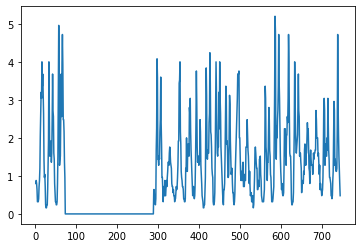

In [70]:
#sums up all loans for one entire day in 2017
def loans_per_day(month, day):
    day_in_2017_start = datetime(2017, month, day, 0, 0)
    day_in_2017_end = datetime(2017, month, day, 23, 59)
    df_day_start = df_bikes[df_bikes["start_time"] >= day_in_2017_start]
    df_day_end = df_day_start[df_day_start["start_time"] <= day_in_2017_end]
    return len(df_day_end)

loans_per_day(1, 26)

1426

In [71]:

#creates an array containing the total number of loans for one entire day for one month
month_arr = []
for i in range(1, 31):
    month_arr.append(loans_per_day(1, i))
print(month_arr)


[856, 1510, 1854, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1397, 621, 772, 1017, 1026, 1485, 1612, 1229, 1206, 641, 536, 1111, 1686, 1426, 1347, 827, 806, 1268]


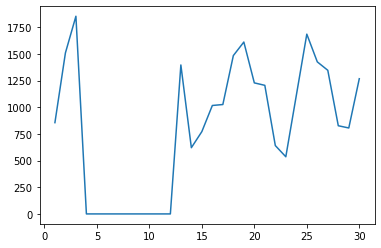

In [72]:

#total number of loans for one entire day for one month as lineplot
x = range(1, 31)
y = month_arr
plt.plot(x, y)

## KPI: Profit

In [73]:
#Notes:
# Prices from Indego's official website from 2021 for the user types OneDayPass, TwoDayPass, Indego30 and Indego365.
# For the user types Walk-up and IndegoFlex we took the official Indego prices for 2015. The price for Walk-up is 4$
# for every beginning 30 minutes. For IndegoFlex it is 4$ for every beginning 60 minutes.
# The four following mentioned calculations just contain the profit from overdrafts of the loans for user type OneDayPass
# (we assume that the 2021 Guest Pass is based on the user types OneDayPass and TwoDayPass - the cost for overtime are
# 15¢/minute for rides over 30 minutes) and the user types Indego30 and Indego365 (15¢/minute for rides over 60 minutes).
# Of course the biggest profit of OneDayPass, TwoDayPass, Indego30 and Indego 365 is made from selling passes but we do
# not have any information about the amount of sold passes so we focused on profit from overdrafts.


# profit from overtime loans of usertype OneDayPass

minutes30 = timedelta(minutes=30)

df_one_day = df_bikes[df_bikes['user_type'] == 'One Day Pass']
df_one_day_more_than_30_mins = df_one_day[df_one_day['ride_duration_minutes'] > minutes30]
df_one_day_more_than_30_mins['overtime'] = df_one_day_more_than_30_mins['ride_duration_minutes'] - minutes30

df_one_day_more_than_30_mins['costs_overtime'] = df_one_day_more_than_30_mins['overtime'].apply(lambda x: (x.total_seconds() / 60) * 0.15)

df_one_day_more_than_30_mins.head()

<ipython-input-73-9156384df2a4>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_one_day_more_than_30_mins['overtime'] = df_one_day_more_than_30_mins['ride_duration_minutes'] - minutes30
<ipython-input-73-9156384df2a4>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_one_day_more_than_30_mins['costs_overtime'] = df_one_day_more_than_30_mins['overtime'].apply(lambda x: (x.total_seconds() / 60) * 0.15)


,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,ride_duration_minutes,temperature,precip,weekday,is_weekday,overtime,costs_overtime
327848,2017-06-30 20:34:00,2017-06-30 21:40:00,3057,3045,2690,One Day Pass,Philadelphia Museum of Art,13th & Locust,0 days 01:06:00,33.30,0.0,4,1,0 days 00:36:00,5.40
328487,2017-07-01 08:35:00,2017-07-01 12:07:00,3029,3029,5212,One Day Pass,36th & Sansom,36th & Sansom,0 days 03:32:00,25.60,0.0,5,0,0 days 03:02:00,27.30
328951,2017-07-01 12:39:00,2017-07-01 13:11:00,3074,3061,2588,One Day Pass,44th & Walnut,23rd & Market,0 days 00:32:00,25.85,0.0,5,0,0 days 00:02:00,0.30
329061,2017-07-01 13:24:00,2017-07-01 16:13:00,3061,3006,2588,One Day Pass,23rd & Market,40th & Spruce,0 days 02:49:00,27.75,0.0,5,0,0 days 02:19:00,20.85
329174,2017-07-01 14:11:00,2017-07-01 14:52:00,3050,3058,2682,One Day Pass,9th & Arch,20th & Fairmount,0 days 00:41:00,27.75,0.0,5,0,0 days 00:11:00,1.65


In [74]:
# total sum of all  overtime loans of usertype OneDayPass
sum_one_day_Overtime_Profit = sum(df_one_day_more_than_30_mins['costs_overtime'].apply(lambda x: x))
print(sum_one_day_Overtime_Profit)

12916.499999999995


In [75]:
# profit from overtime loans of usertype TwoDayPass

df_two_day = df_bikes[df_bikes['user_type'] == 'Two Day Pass']
df_two_day_more_than_30_mins = df_two_day[df_two_day['ride_duration_minutes'] > minutes30]
df_two_day_more_than_30_mins['overtime'] = df_two_day_more_than_30_mins['ride_duration_minutes'] - minutes30

df_two_day_more_than_30_mins['costs_overtime'] = df_two_day_more_than_30_mins['overtime'].apply(lambda x: (x.total_seconds() / 60) * 0.15)

df_two_day_more_than_30_mins.head()

<ipython-input-75-7f959b0ba5cc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_two_day_more_than_30_mins['overtime'] = df_two_day_more_than_30_mins['ride_duration_minutes'] - minutes30
<ipython-input-75-7f959b0ba5cc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_two_day_more_than_30_mins['costs_overtime'] = df_two_day_more_than_30_mins['overtime'].apply(lambda x: (x.total_seconds() / 60) * 0.15)


,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,ride_duration_minutes,temperature,precip,weekday,is_weekday,overtime,costs_overtime
426531,2017-08-03 09:50:00,2017-08-03 15:16:00,3023,3023,5206,Two Day Pass,Rittenhouse Square,Rittenhouse Square,0 days 05:26:00,22.2,0.0,3,1,0 days 04:56:00,44.40
427254,2017-08-03 15:24:00,2017-08-03 16:04:00,3057,3101,11775,Two Day Pass,Philadelphia Museum of Art,11th & South,0 days 00:40:00,26.7,0.0,3,1,0 days 00:10:00,1.50
430049,2017-08-04 10:42:00,2017-08-04 12:07:00,3018,3020,11023,Two Day Pass,12th & Filbert,University City Station,0 days 01:25:00,22.2,0.0,4,1,0 days 00:55:00,8.25
430153,2017-08-04 11:28:00,2017-08-04 13:53:00,3023,3023,5373,Two Day Pass,Rittenhouse Square,Rittenhouse Square,0 days 02:25:00,23.3,0.0,4,1,0 days 01:55:00,17.25
430261,2017-08-04 12:09:00,2017-08-04 13:28:00,3020,3020,3375,Two Day Pass,University City Station,University City Station,0 days 01:19:00,23.3,0.0,4,1,0 days 00:49:00,7.35


In [76]:
# total sum of all  overtime loans of usertype TwoDayPass
sum_two_day_Overtime_Profit = sum(df_two_day_more_than_30_mins['costs_overtime'].apply(lambda x: x))
print(sum_two_day_Overtime_Profit)


1676.5500000000002


In [77]:
import math

# Calculation for user type 'Walk-up' based on the official 2015 prices of Indego. It costs 4$ every beginning 30 Minutes.

df_walk_up = df_bikes[df_bikes['user_type'] == 'Walk-up']
df_walk_up['duration_to_seconds'] = df_walk_up['ride_duration_minutes'].apply(lambda x: x.total_seconds())
df_walk_up['price'] = df_walk_up['duration_to_seconds'].apply(lambda x: (int(math.ceil(x/1800)))*4)

#test
df_walk_up.head(5)

<ipython-input-77-f87c83ff1ad5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_walk_up['duration_to_seconds'] = df_walk_up['ride_duration_minutes'].apply(lambda x: x.total_seconds())
<ipython-input-77-f87c83ff1ad5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_walk_up['price'] = df_walk_up['duration_to_seconds'].apply(lambda x: (int(math.ceil(x/1800)))*4)


,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,ride_duration_minutes,temperature,precip,weekday,is_weekday,duration_to_seconds,price
1,2017-01-01 00:21:00,2017-01-01 00:57:00,3110,3054,3364,Walk-up,Del. River Trail & Penn St.,Rodin Museum,0 days 00:36:00,6.1,0.0,6,0,2160.0,8
2,2017-01-01 00:22:00,2017-01-01 00:57:00,3110,3054,2536,Walk-up,Del. River Trail & Penn St.,Rodin Museum,0 days 00:35:00,6.1,0.0,6,0,2100.0,8
4,2017-01-01 00:28:00,2017-01-01 00:36:00,3047,3124,5370,Walk-up,"Independence Mall, NPS",Race Street Pier,0 days 00:08:00,6.1,0.0,6,0,480.0,4
5,2017-01-01 00:29:00,2017-01-01 00:36:00,3047,3124,2479,Walk-up,"Independence Mall, NPS",Race Street Pier,0 days 00:07:00,6.1,0.0,6,0,420.0,4
8,2017-01-01 00:38:00,2017-01-01 00:57:00,3013,3028,3716,Walk-up,6th & Fairmount,4th & Bainbridge,0 days 00:19:00,6.1,0.0,6,0,1140.0,4


In [78]:
# total sum of all Walk-up profits

sum_Walk_up_profit = sum(df_walk_up['price'].apply(lambda x: x))
print(sum_Walk_up_profit)


806432


In [79]:
# Calculation for user type 'IndegoFlex' based on the official 2015 prices of Indego. It costs 4$ every beginning 60 Minutes.

df_flex = df_bikes[df_bikes['user_type'] == 'IndegoFlex']
df_flex['duration_to_seconds'] = df_flex['ride_duration_minutes'].apply(lambda x: x.total_seconds())
df_flex['price'] = df_flex['duration_to_seconds'].apply(lambda x: (int(math.ceil(x/3600)))*4)

#test
df_flex.head(5)

<ipython-input-79-9a891169e663>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_flex['duration_to_seconds'] = df_flex['ride_duration_minutes'].apply(lambda x: x.total_seconds())
<ipython-input-79-9a891169e663>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_flex['price'] = df_flex['duration_to_seconds'].apply(lambda x: (int(math.ceil(x/3600)))*4)


,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,ride_duration_minutes,temperature,precip,weekday,is_weekday,duration_to_seconds,price
190,2017-01-01 11:39:00,2017-01-01 11:44:00,3012,3114,3378,IndegoFlex,21st & Catharine,22nd & Federal,0 days 00:05:00,5.6,0.0,6,0,300.0,4
195,2017-01-01 11:42:00,2017-01-01 11:54:00,3054,3125,5182,IndegoFlex,Rodin Museum,15th & South,0 days 00:12:00,5.6,0.0,6,0,720.0,4
235,2017-01-01 12:26:00,2017-01-01 12:42:00,3037,3014,5214,IndegoFlex,Pennsylvania Convention Center,"21st & Winter, Franklin Institute",0 days 00:16:00,5.0,0.0,6,0,960.0,4
464,2017-01-01 15:22:00,2017-01-01 15:30:00,3068,3010,11009,IndegoFlex,Broad & Federal,15th & Spruce,0 days 00:08:00,7.2,0.0,6,0,480.0,4
625,2017-01-01 17:27:00,2017-01-01 17:49:00,3010,3099,3315,IndegoFlex,15th & Spruce,4th & Washington,0 days 00:22:00,9.4,0.0,6,0,1320.0,4


In [80]:
# total sum of all IndegoFlex profits

sum_flex_profit = sum(df_flex['price'].apply(lambda x: x))
print(sum_flex_profit)


28592


In [81]:
#profit from overtime loans of usertype Indego30
minutes60 = timedelta(minutes=60)

df_Indego30 = df_bikes[df_bikes["user_type"] == "Indego30"]
df_Indego30_more_than_60_mins = df_Indego30[df_Indego30["ride_duration_minutes"] > minutes60]
df_Indego30_more_than_60_mins["overtime"] = df_Indego30_more_than_60_mins["ride_duration_minutes"] - minutes60

df_Indego30_more_than_60_mins["costs_overtime"] = df_Indego30_more_than_60_mins["overtime"].apply(lambda x: (x.total_seconds() / 60) * 0.15)

df_Indego30_more_than_60_mins.head()

<ipython-input-81-b35ca3b40742>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Indego30_more_than_60_mins["overtime"] = df_Indego30_more_than_60_mins["ride_duration_minutes"] - minutes60
<ipython-input-81-b35ca3b40742>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Indego30_more_than_60_mins["costs_overtime"] = df_Indego30_more_than_60_mins["overtime"].apply(lambda x: (x.total_seconds() / 60) * 0.15)


,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,ride_duration_minutes,temperature,precip,weekday,is_weekday,overtime,costs_overtime
60,2017-01-01 02:52:00,2017-01-01 03:56:00,3059,3073,11042,Indego30,"Spring Garden Station, BSL",9th & Spring Garden,0 days 01:04:00,7.2,0.0,6,0,0 days 00:04:00,0.60
106,2017-01-01 09:04:00,2017-01-01 11:34:00,3102,3068,5254,Indego30,Pennsylvania & Fairmount Perelman Building,Broad & Federal,0 days 02:30:00,6.1,0.0,6,0,0 days 01:30:00,13.50
152,2017-01-01 10:54:00,2017-01-01 12:32:00,3112,3010,3730,Indego30,48th & Spruce,15th & Spruce,0 days 01:38:00,5.6,0.0,6,0,0 days 00:38:00,5.70
249,2017-01-01 12:40:00,2017-01-01 15:46:00,3053,3037,5284,Indego30,Point Breeze & Tasker,Pennsylvania Convention Center,0 days 03:06:00,5.6,0.0,6,0,0 days 02:06:00,18.90
573,2017-01-01 16:50:00,2017-01-01 19:53:00,3013,3000,5312,Indego30,6th & Fairmount,Virtual Station,0 days 03:03:00,10.0,0.0,6,0,0 days 02:03:00,18.45


In [82]:
#total sum of all  overtime loans of usertype Indego30
sumIndego30OvertimeProfit = sum(df_Indego30_more_than_60_mins["costs_overtime"].apply(lambda x: x))
print(sumIndego30OvertimeProfit)

243098.84999999878


In [83]:
#profit from overtime loans of usertype Indego365

df_Indego365 = df_bikes[df_bikes["user_type"] == "Indego365"]
df_Indego365_more_than_60_mins = df_Indego365[df_Indego365["ride_duration_minutes"] > minutes60]
df_Indego365_more_than_60_mins["overtime"] = df_Indego365_more_than_60_mins["ride_duration_minutes"] - minutes60

df_Indego365_more_than_60_mins["costs_overtime"] = df_Indego365_more_than_60_mins["overtime"].apply(lambda x: (x.total_seconds() / 60) * 0.15)

df_Indego365_more_than_60_mins.head()

<ipython-input-83-19c6c47cf291>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Indego365_more_than_60_mins["overtime"] = df_Indego365_more_than_60_mins["ride_duration_minutes"] - minutes60
<ipython-input-83-19c6c47cf291>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Indego365_more_than_60_mins["costs_overtime"] = df_Indego365_more_than_60_mins["overtime"].apply(lambda x: (x.total_seconds() / 60) * 0.15)


,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,ride_duration_minutes,temperature,precip,weekday,is_weekday,overtime,costs_overtime
681525,2017-10-27 07:58:00,2017-10-27 11:19:00,3028,3000,11948,Indego365,4th & Bainbridge,Virtual Station,0 days 03:21:00,7.2,0.0,4,1,0 days 02:21:00,21.15
684339,2017-10-28 07:50:00,2017-10-28 09:37:00,3150,3086,11860,Indego365,"15th & Castle, DiSilvestro Playground",Broad & Christian,0 days 01:47:00,11.1,0.0,5,0,0 days 00:47:00,7.05
684483,2017-10-28 09:08:00,2017-10-28 10:25:00,3061,3026,5312,Indego365,23rd & Market,2nd & South,0 days 01:17:00,10.6,0.0,5,0,0 days 00:17:00,2.55
684572,2017-10-28 09:38:00,2017-10-28 10:52:00,3018,3017,5335,Indego365,12th & Filbert,6th & Berks,0 days 01:14:00,10.0,0.0,5,0,0 days 00:14:00,2.10
685254,2017-10-28 12:09:00,2017-10-28 13:37:00,3007,3007,11916,Indego365,"11th & Pine, Kahn Park","11th & Pine, Kahn Park",0 days 01:28:00,10.6,0.0,5,0,0 days 00:28:00,4.20


In [84]:
#total sum of all  overtime loans of usertype Indego365
sumIndego365OvertimeProfit = sum(df_Indego365_more_than_60_mins["costs_overtime"].apply(lambda x: x))
print(sumIndego365OvertimeProfit)

1584.1499999999992


In [85]:
# array containing all dates of the year
start_2017 = datetime(2017, 1, 1)
add_day = timedelta(days = 1)

days_2017 = []

for i in range(0, 365):
    days_2017.append(start_2017)
    start_2017 += add_day

print(days_2017)


[datetime.datetime(2017, 1, 1, 0, 0), datetime.datetime(2017, 1, 2, 0, 0), datetime.datetime(2017, 1, 3, 0, 0), datetime.datetime(2017, 1, 4, 0, 0), datetime.datetime(2017, 1, 5, 0, 0), datetime.datetime(2017, 1, 6, 0, 0), datetime.datetime(2017, 1, 7, 0, 0), datetime.datetime(2017, 1, 8, 0, 0), datetime.datetime(2017, 1, 9, 0, 0), datetime.datetime(2017, 1, 10, 0, 0), datetime.datetime(2017, 1, 11, 0, 0), datetime.datetime(2017, 1, 12, 0, 0), datetime.datetime(2017, 1, 13, 0, 0), datetime.datetime(2017, 1, 14, 0, 0), datetime.datetime(2017, 1, 15, 0, 0), datetime.datetime(2017, 1, 16, 0, 0), datetime.datetime(2017, 1, 17, 0, 0), datetime.datetime(2017, 1, 18, 0, 0), datetime.datetime(2017, 1, 19, 0, 0), datetime.datetime(2017, 1, 20, 0, 0), datetime.datetime(2017, 1, 21, 0, 0), datetime.datetime(2017, 1, 22, 0, 0), datetime.datetime(2017, 1, 23, 0, 0), datetime.datetime(2017, 1, 24, 0, 0), datetime.datetime(2017, 1, 25, 0, 0), datetime.datetime(2017, 1, 26, 0, 0), datetime.datetime(20

In [87]:
# shows loans of every day - just for orientation
# missing values (in january, february and march 2017) are taken from the calculation for regression

#create for every month in 2017 an array of the daily total amount of loans and then combine them
#in another array
days_28 = range(0, 28)
days_30 = range(0, 30)
days_31 = range(0, 31)

jan_loans = []
for i in range(1, 32):
    jan_loans.append(loans_per_day(1, i))
jan_Series = pd.Series(jan_loans, index=days_31)
#jan_loans[3] =
#jan_loans[4] =
#jan_loans[5] =
#jan_loans[6] =
#jan_loans[7] =
#jan_loans[8] =
#jan_loans[9] =
#jan_loans[10] =
#jan_loans[11] =

feb_loans = []
for i in range(1, 29):
    feb_loans.append(loans_per_day(2, i))
feb_Series = pd.Series(feb_loans, index=days_28)
#feb_loans[3] =
#feb_loans[4] =
#feb_loans[5] =
#feb_loans[6] =
#feb_loans[7] =
#feb_loans[8] =
#feb_loans[9] =
#feb_loans[10] =
#feb_loans[11] =

mar_loans = []
for i in range(1, 32):
    mar_loans.append(loans_per_day(3, i))
mar_Series = pd.Series(mar_loans, index=days_31)
#mar_loans[3] =
#mar_loans[4] =
#mar_loans[5] =
#mar_loans[6] =
#mar_loans[7] =
#mar_loans[8] =
#mar_loans[9] =
#mar_loans[10] =
#mar_loans[11] =

apr_loans = []
for i in range(1, 31):
    apr_loans.append(loans_per_day(4, i))
apr_Series = pd.Series(apr_loans, index=days_30)

may_loans = []
for i in range(1, 32):
    may_loans.append(loans_per_day(5, i))
may_Series = pd.Series(may_loans, index=days_31)

jun_loans = []
for i in range(1, 31):
    jun_loans.append(loans_per_day(6, i))
jun_Series = pd.Series(jun_loans, index=days_30)

jul_loans = []
for i in range(1, 32):
    jul_loans.append(loans_per_day(7, i))
jul_Series = pd.Series(jul_loans, index=days_31)

aug_loans = []
for i in range(1, 32):
    aug_loans.append(loans_per_day(8, i))
aug_Series = pd.Series(aug_loans, index=days_31)

sep_loans = []
for i in range(1, 31):
    sep_loans.append(loans_per_day(9, i))
sep_Series = pd.Series(sep_loans, index=days_30)

oct_loans = []
for i in range(1, 32):
    oct_loans.append(loans_per_day(10, i))
oct_Series = pd.Series(oct_loans, index=days_31)

nov_loans = []
for i in range(1, 31):
    nov_loans.append(loans_per_day(11, i))
nov_Series = pd.Series(nov_loans, index=days_30)

dec_loans = []
for i in range(1, 32):
    dec_loans.append(loans_per_day(12, i))
dec_Series = pd.Series(dec_loans, index=days_31)

print(jan_Series.__len__(), feb_Series.__len__(), mar_Series.__len__(), apr_Series.__len__(),may_Series.__len__(), jun_Series.__len__(), jul_Series.__len__(), aug_Series.__len__(), sep_Series.__len__(), oct_Series.__len__(), nov_Series.__len__(), dec_Series.__len__())


31 28 31 30 31 30 31 31 30 31 30 31


In [88]:
month_loans_sum = [jan_loans, feb_loans, mar_loans, apr_loans, may_loans, jun_loans, jul_loans, aug_loans, sep_loans, oct_loans, nov_loans, dec_loans]
daily_loans_2017 = []

for i in range(0, month_loans_sum.__len__()):
    for j in range(0, month_loans_sum[i].__len__()):
        daily_loans_2017.append(month_loans_sum[i][j])

print(daily_loans_2017)

[856, 1510, 1854, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1397, 621, 772, 1017, 1026, 1485, 1612, 1229, 1206, 641, 536, 1111, 1686, 1426, 1347, 827, 806, 1268, 1257, 322, 1482, 1545, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1080, 1318, 1530, 1285, 1337, 1753, 2205, 1850, 1664, 1908, 2043, 2360, 1652, 903, 1629, 1728, 718, 1218, 1323, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1273, 70, 323, 601, 868, 470, 744, 1604, 1848, 1459, 1448, 1706, 1601, 806, 1537, 1013, 1986, 1667, 474, 2460, 2527, 2788, 2166, 2520, 1163, 1513, 1550, 2206, 2581, 2835, 2760, 2570, 2604, 1982, 2004, 2282, 2833, 2458, 2739, 1819, 936, 2251, 2109, 1166, 2360, 3418, 3357, 2933, 1987, 3766, 3557, 3431, 2666, 1315, 1919, 1496, 2455, 2631, 2800, 2505, 2321, 320, 1772, 2610, 3036, 2957, 2699, 2718, 1872, 2232, 1673, 2727, 2707, 992, 2480, 2374, 1920, 1285, 1928, 2905, 3853, 4722, 4089, 2299, 2406, 2276, 2833, 2976, 3159, 2838, 2295, 2772, 2902, 3058, 3356, 3099, 1712, 2199, 1988, 3248, 2973, 3207, 2673, 2631, 2539, 3146, 3332, 3417, 3388, 3144, 2080, 4064, 4493

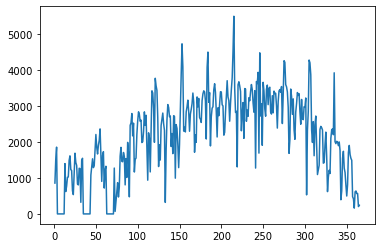

In [89]:
x1 = range(1, 366)
y1 = daily_loans_2017
plt.xlabel('Days')
plt.ylabel('Bike Loans (absolute)')
plt.plot(x1, y1)


In [90]:
days = range(0, 365)

days_Series = pd.Series(days_2017, index=days)
days_Series

0     2017-01-01
1     2017-01-02
2     2017-01-03
3     2017-01-04
4     2017-01-05
         ...    
360   2017-12-27
361   2017-12-28
362   2017-12-29
363   2017-12-30
364   2017-12-31
Length: 365, dtype: datetime64[ns]

In [115]:
# Calculate revenue for all 4 quarters: OneDayPass

qu1 = datetime(2017, 3, 31, 23, 59)
qu2 = datetime(2017, 6, 30, 23, 59)
qu3 = datetime(2017, 9, 30, 23, 59)
qu4 = datetime(2017, 12, 31, 23, 59)


qu1_OneDay = df_one_day_more_than_30_mins[df_one_day_more_than_30_mins["start_time"] <= qu1]
sum_Q1_OneDay = sum(qu1_OneDay["costs_overtime"].apply(lambda x: x))

qu2_OneDay = df_one_day_more_than_30_mins[df_one_day_more_than_30_mins["start_time"] > qu1]
qu2_OneDay_s = qu2_OneDay[qu2_OneDay["start_time"] <= qu2]
sum_Q2_OneDay = sum(qu2_OneDay_s["costs_overtime"].apply(lambda x: x))

qu3_OneDay = df_one_day_more_than_30_mins[df_one_day_more_than_30_mins["start_time"] > qu2]
qu3_OneDay_s = qu3_OneDay[qu3_OneDay["start_time"] <= qu3]
sum_Q3_OneDay = sum(qu3_OneDay_s["costs_overtime"].apply(lambda x: x))

qu4_OneDay = df_one_day_more_than_30_mins[df_one_day_more_than_30_mins["start_time"] > qu3]
sum_Q4_OneDay = sum(qu4_OneDay["costs_overtime"].apply(lambda x: x))

sumROneDay = sum_Q1_OneDay + sum_Q2_OneDay + sum_Q3_OneDay + sum_Q4_OneDay

print(sumROneDay)

12916.499999999996


In [116]:
# Calculate revenue for all 4 quarters: TwoDayPass

qu1_TwoDay = df_two_day_more_than_30_mins[df_two_day_more_than_30_mins["start_time"] <= qu1]
sum_Q1_TwoDay = sum(qu1_TwoDay["costs_overtime"].apply(lambda x: x))

qu2_TwoDay = df_two_day_more_than_30_mins[df_two_day_more_than_30_mins["start_time"] > qu1]
qu2_TwoDay_s = qu2_TwoDay[qu2_TwoDay["start_time"] <= qu2]
sum_Q2_TwoDay = sum(qu2_TwoDay_s["costs_overtime"].apply(lambda x: x))

qu3_TwoDay = df_two_day_more_than_30_mins[df_two_day_more_than_30_mins["start_time"] > qu2]
qu3_TwoDay_s = qu3_TwoDay[qu3_TwoDay["start_time"] <= qu3]
sum_Q3_TwoDay = sum(qu3_TwoDay_s["costs_overtime"].apply(lambda x: x))

qu4_TwoDay = df_two_day_more_than_30_mins[df_two_day_more_than_30_mins["start_time"] > qu3]
sum_Q4_TwoDay = sum(qu4_TwoDay["costs_overtime"].apply(lambda x: x))

sumRTwoDay = sum_Q1_TwoDay + sum_Q2_TwoDay + sum_Q3_TwoDay + sum_Q4_TwoDay

print(sumRTwoDay)

1676.5500000000002


In [117]:
# Calculate revenue for all 4 quarters: Walk-up

qu1_WalkUp = df_walk_up[df_walk_up["start_time"] <= qu1]
sum_Q1_WalkUp = sum(qu1_WalkUp["price"].apply(lambda x: x))

qu2_WalkUp = df_walk_up[df_walk_up["start_time"] > qu1]
qu2_WalkUp_s = qu2_WalkUp[qu2_WalkUp["start_time"] <= qu2]
sum_Q2_WalkUp = sum(qu2_WalkUp_s["price"].apply(lambda x: x))

qu3_WalkUp = df_walk_up[df_walk_up["start_time"] > qu2]
qu3_WalkUp_s = qu3_WalkUp[qu3_WalkUp["start_time"] <= qu3]
sum_Q3_WalkUp = sum(qu3_WalkUp_s["price"].apply(lambda x: x))

qu4_WalkUp = df_walk_up[df_walk_up["start_time"] > qu3]
sum_Q4_WalkUp = sum(qu4_WalkUp["price"].apply(lambda x: x))

sumRWalkUp = sum_Q1_WalkUp + sum_Q2_WalkUp + sum_Q3_WalkUp + sum_Q4_WalkUp

print(sumRWalkUp)

806432


In [118]:
# Calculate revenue for all 4 quarters: IndegoFlex

qu1_flex = df_flex[df_flex["start_time"] <= qu1]
sum_Q1_flex = sum(qu1_flex["price"].apply(lambda x: x))

qu2_flex = df_flex[df_flex["start_time"] > qu1]
qu2_flex_s = qu2_flex[qu2_flex["start_time"] <= qu2]
sum_Q2_flex = sum(qu2_flex_s["price"].apply(lambda x: x))

qu3_flex = df_flex[df_flex["start_time"] > qu2]
qu3_flex_s = qu3_flex[qu3_flex["start_time"] <= qu3]
sum_Q3_flex = sum(qu3_flex_s["price"].apply(lambda x: x))

qu4_flex = df_flex[df_flex["start_time"] > qu3]
sum_Q4_flex = sum(qu4_flex["price"].apply(lambda x: x))

sumRFlex = sum_Q1_flex + sum_Q2_flex + sum_Q3_flex + sum_Q4_flex

print(sumRFlex)

28592


In [119]:
# Calculate revenue for all 4 quarters: Indego30

qu1_Indego30 = df_Indego30_more_than_60_mins[df_Indego30_more_than_60_mins["start_time"] <= qu1]
sum_Q1_Indego30 = sum(qu1_Indego30["costs_overtime"].apply(lambda x: x))

qu2_Indego30 = df_Indego30_more_than_60_mins[df_Indego30_more_than_60_mins["start_time"] > qu1]
qu2_Indego30_s = qu2_Indego30[qu2_Indego30["start_time"] <= qu2]
sum_Q2_Indego30 = sum(qu2_Indego30_s["costs_overtime"].apply(lambda x: x))

qu3_Indego30 = df_Indego30_more_than_60_mins[df_Indego30_more_than_60_mins["start_time"] > qu2]
qu3_Indego30_s = qu3_Indego30[qu3_Indego30["start_time"] <= qu3]
sum_Q3_Indego30 = sum(qu3_Indego30_s["costs_overtime"].apply(lambda x: x))

qu4_Indego30 = df_Indego30_more_than_60_mins[df_Indego30_more_than_60_mins["start_time"] > qu3]
sum_Q4_Indego30 = sum(qu4_Indego30["costs_overtime"].apply(lambda x: x))

sumR30 = sum_Q1_Indego30 + sum_Q2_Indego30 + sum_Q3_Indego30 + sum_Q4_Indego30

print(sumR30)

243098.85000000006


In [120]:
# Calculate revenue for all 4 quarters: Indego30

qu1_Indego365 = df_Indego365_more_than_60_mins[df_Indego365_more_than_60_mins["start_time"] <= qu1]
sum_Q1_Indego365 = sum(qu1_Indego365["costs_overtime"].apply(lambda x: x))

qu2_Indego365 = df_Indego365_more_than_60_mins[df_Indego365_more_than_60_mins["start_time"] > qu1]
qu2_Indego365_s = qu2_Indego365[qu2_Indego365["start_time"] <= qu2]
sum_Q2_Indego365 = sum(qu2_Indego365_s["costs_overtime"].apply(lambda x: x))

qu3_Indego365 = df_Indego365_more_than_60_mins[df_Indego365_more_than_60_mins["start_time"] > qu2]
qu3_Indego365_s = qu3_Indego365[qu3_Indego365["start_time"] <= qu3]
sum_Q3_Indego365 = sum(qu3_Indego365_s["costs_overtime"].apply(lambda x: x))

qu4_Indego365 = df_Indego365_more_than_60_mins[df_Indego365_more_than_60_mins["start_time"] > qu3]
sum_Q4_Indego365 = sum(qu4_Indego365["costs_overtime"].apply(lambda x: x))

sumR365 = sum_Q1_Indego365 + sum_Q2_Indego365 + sum_Q3_Indego365 + sum_Q4_Indego365

print(sumR365)

1584.1499999999992


In [122]:
revenue_dict = {'Indego30': sumR30,
                  'WalkUp': sumRWalkUp,
                  'IndegoFlex': sumRFlex,
                  'OneDayPass': sumROneDay,
                  'TwoDayPass': sumRTwoDay,
                  'Indego365': sumR365
                 }

revenue_dict

{'Indego30': 243098.85000000006,
 'WalkUp': 806432,
 'IndegoFlex': 28592,
 'OneDayPass': 12916.499999999996,
 'TwoDayPass': 1676.5500000000002,
 'Indego365': 1584.1499999999992}

Now we plot the quarters in pie charts

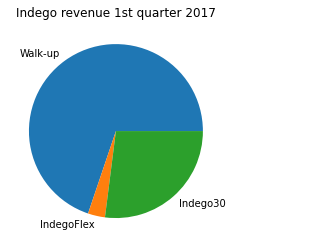

In [135]:
# 1st quarter

quarter1 = np.array([sum_Q1_WalkUp, sum_Q1_flex, sum_Q1_Indego30, sum_Q1_OneDay, sum_Q1_TwoDay, sum_Q1_Indego365])
ourlabels = ["Walk-up", "IndegoFlex", "Indego30", "", " ", " "]
ourexplode = [0, 0, 0, 1.2, 0.2, 0.2]

plt.pie(quarter1, labels=ourlabels, explode=ourexplode)
plt.title('Indego revenue 1st quarter 2017')
plt.savefig('RevenueQu1.png')
plt.show()

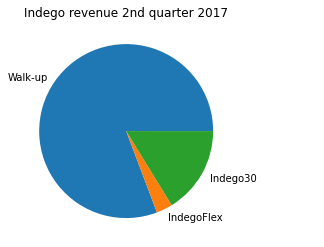

In [136]:
# 2nd quarter

quarter2 = np.array([sum_Q2_WalkUp, sum_Q2_flex, sum_Q2_Indego30, sum_Q2_OneDay, sum_Q2_TwoDay, sum_Q2_Indego365])

plt.pie(quarter2, labels=ourlabels, explode=ourexplode)
plt.title('Indego revenue 2nd quarter 2017')
plt.savefig('RevenueQu2.png')
plt.show()

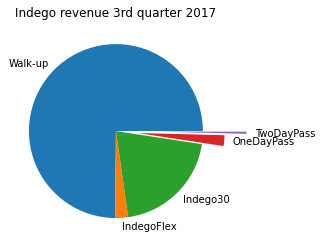

In [137]:
# 3rd quarter

quarter3 = np.array([sum_Q3_WalkUp, sum_Q3_flex, sum_Q3_Indego30, sum_Q3_OneDay, sum_Q3_TwoDay, sum_Q3_Indego365])
ourlabels2 = ["Walk-up", "IndegoFlex", "Indego30", "OneDayPass", "TwoDayPass", " "]
ourexplode2 = [0, 0, 0, 0.25, 0.5, 0.5]

plt.pie(quarter3, labels=ourlabels2, explode=ourexplode2)
plt.title('Indego revenue 3rd quarter 2017')
plt.savefig('RevenueQu3.png')
plt.show()

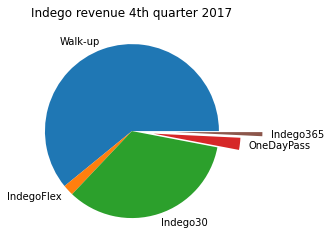

In [138]:
# 4th quarter

quarter4 = np.array([sum_Q4_WalkUp, sum_Q4_flex, sum_Q4_Indego30, sum_Q4_OneDay, sum_Q4_TwoDay, sum_Q4_Indego365])
ourlabels3 = ["Walk-up", "IndegoFlex", "Indego30", "OneDayPass", " ", "Indego365"]

plt.pie(quarter4, labels=ourlabels3, explode=ourexplode2)
plt.title('Indego revenue 4th quarter 2017')
plt.savefig('RevenueQu4.png')
plt.show()